# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [55]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [56]:
y.shape

(70000,)

In [57]:
X.shape

(70000, 784)

In [58]:
print(type(mnist))


print(mnist.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [59]:
dataframe = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
dataframe['target'] = mnist.target

In [60]:
dataframe.shape

(70000, 785)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [61]:
mnist.target[36000]

'9'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

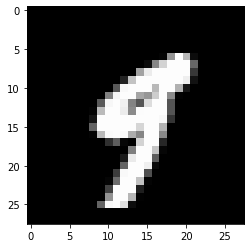

In [62]:
from matplotlib import pyplot as plt
import numpy as np



first_image = mnist.data[36000]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [63]:
mnist.target[36000]
dataframe.iloc[36000]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
pixel30     0
           ..
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
target      9
Name: 36000, Length: 785, dtype: object

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [64]:

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [65]:
print(X_train.shape)
print(X_test.shape)


print(y_train.shape)
print(y_test.shape)


(60000, 784)
(10000, 784)
(60000,)
(10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [98]:
dataframe.head()
print(dataframe.shape)

(70000, 785)


In [103]:
y_train_5 = y_train == "5"
print(y_train_5)
y_train.shape

[ True False False ...  True False False]


(60000,)

In [104]:
y_test_5 = y_test == "5"
print(y_test_5)
y_test.shape

[False False False ... False  True False]


(10000,)

In [105]:
y_test_5

array([False, False, False, ..., False,  True, False])

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [106]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=100,
                        C=50)
clf.fit(X_train, y_train_5)

/home/jc/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=50, solver='saga')

In [107]:
Z = clf.predict(X_test)

In [108]:
Z

array([False, False, False, ..., False,  True, False])

### Does the classifier predict correctly the 36000th digit we picked before?

In [138]:


a=clf.predict(X_train)
a.shape
a[36000]

#It does , as it says that is not a 5 (it was a 9)

False

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [111]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [112]:
never_5_clf.fit(X_train, y_train)

In [113]:
never_5_clf.predict(X_test)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

#### 1-Confusion matrix task

In [115]:
from sklearn.metrics import confusion_matrix
y_pred_never_5=never_5_clf.predict(X_test)
y_pred_lr=clf.predict(X_test)
confusion_matrix(y_test_5, y_pred_lr)


array([[9037,   71],
       [ 150,  742]])

In [116]:
cm_lr=confusion_matrix(y_test_5, y_pred_lr)

True_negatives_lr=cm_lr[0][0]
print(True_negatives_lr)

False_positives_lr=cm_lr[0][1]
print(False_positives_lr)


False_negatives_lr=cm_lr[1][0]
print(False_negatives_lr)

True_positives_lr=cm_lr[1][1]
print(True_positives_lr)

9037
71
150
742


In [117]:
cm_never_5=confusion_matrix(y_test_5, y_pred_never_5)

True_negatives_never_5=cm_never_5[0][0]
print(True_negatives_never_5)


False_positives_never_5=cm_never_5[0][1]
print(False_positives_never_5)

False_negatives_never_5=cm_never_5[1][0]
print(False_negatives_never_5)


True_positives_never_5=cm_never_5[1][1]
print(True_positives_never_5)

9108
0
892
0


#### 2-Precision

In [125]:
from sklearn.metrics import precision_score

precision_score(y_test_5, y_pred_lr)

0.9126691266912669

#### 3-Recall

In [126]:
from sklearn.metrics import recall_score

In [127]:

recall_score(y_test_5, y_pred_lr)

0.8318385650224215

#### 4-F1

In [129]:
from sklearn.metrics import f1_score
f1_score(y_test_5, y_pred_lr, average='macro')


0.9291507142233146

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

- Precision: we can measure the machine learning quality
- Recall : we can measure the quantity that the ML i capable of identifying
- F1 : allows us to combine precision and recall


All of them are measure between 0 and 1 , the closer to 1 the better.
Thanks to the F1 , giving same importance to recall and precision, we can state that all 3 metrics worked well

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


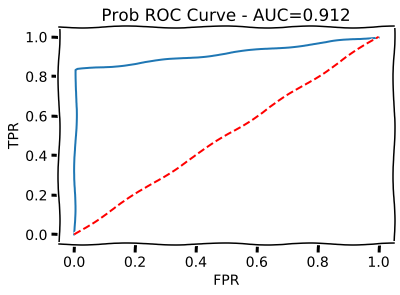

In [130]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

roc_curve(y_test_5, y_pred_lr)
with plt.xkcd():
    fpr, tpr, thresholds = roc_curve(y_test_5, y_pred_lr)
    a = roc_auc_score(y_test_5, y_pred_lr)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Prob ROC Curve - AUC={a:.3f}')
    plt.show();

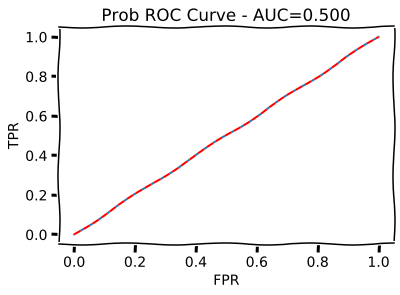

In [131]:
roc_curve(y_test_5, y_pred_never_5)
with plt.xkcd():
    fpr, tpr, thresholds = roc_curve(y_test_5, y_pred_never_5)
    a = roc_auc_score(y_test_5, y_pred_never_5)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Prob ROC Curve - AUC={a:.3f}')
    plt.show();

### Now find the roc_auc_score for each. 

In [134]:
y_pred=never_5_clf.predict(X_test)
print(roc_auc_score(y_test_5, y_pred_lr))


0.9120216101352775


In [137]:
y_pred=clf.predict(X_test)
print(roc_auc_score(y_test_5, y_pred_never_5))


0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

According to the results gather a logistic classifier may be the best solution.

The AUC is 0.912 which is bigger than 0.5